In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use("bmh")

In [2]:
data_points = pd.read_excel("data_1.xlsx")
color = ["red", "orange", "lawngreen", "violet", "seagreen", "darkorange", "lightseagreen", "gold", "palevioletred"]

print(data_points)

         X      Y  Z
0    0.500  2.150  0
1    4.325  2.225  0
2    8.545  3.192  0
3   13.180  4.533  0
4   17.830  6.291  0
5   21.150  7.146  0
6   24.480  7.575  0
7   28.160  7.263  0
8   32.395  6.147  0
9   36.150  4.658  0
10  42.595  2.572  0
11  49.000  2.160  0


#### Create Geometric Matrix

In [3]:
geometric_matrix = np.zeros((len(data_points)+2, 3))
geometric_matrix[0] = [0, 0, 0]
for index in range(1, len(data_points)+1):
    geometric_matrix[index] = [6*data_points["X"][index-1], 6*data_points["Y"][index-1], 6*data_points["Z"][index-1]]
geometric_matrix[len(data_points)+1] = [0, 0 ,0]

print(geometric_matrix)

[[  0.      0.      0.   ]
 [  3.     12.9     0.   ]
 [ 25.95   13.35    0.   ]
 [ 51.27   19.152   0.   ]
 [ 79.08   27.198   0.   ]
 [106.98   37.746   0.   ]
 [126.9    42.876   0.   ]
 [146.88   45.45    0.   ]
 [168.96   43.578   0.   ]
 [194.37   36.882   0.   ]
 [216.9    27.948   0.   ]
 [255.57   15.432   0.   ]
 [294.     12.96    0.   ]
 [  0.      0.      0.   ]]


#### Create coefficient matrix

In [4]:
M = np.zeros((len(data_points)+2, len(data_points)+2))
M[0][0:2] = [1, -1]
for row, column in zip(range(1, len(data_points)+1, 1), range(0, len(data_points))):
    M[row][column:column+3] = [1, 4 , 1]
    row +=1
    column += 1
M[len(data_points)+1][len(data_points):len(data_points)+2] = [1, -1]
print(M)

[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  4.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  4.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  4.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  4.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  4.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  4.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  4.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  4.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  4.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.]]


#### Calculate control vertices matrix

In [5]:
vertices_matrix = np.dot(np.linalg.inv(M),geometric_matrix)
print(vertices_matrix)

[[-0.29074435  2.18158133  0.        ]
 [-0.29074435  2.18158133  0.        ]
 [ 4.45372174  1.99209336  0.        ]
 [ 8.42585737  3.20004524  0.        ]
 [13.11284877  4.3597257   0.        ]
 [18.20274754  6.55905197  0.        ]
 [21.05616108  7.15006644  0.        ]
 [24.47260815  7.71668228  0.        ]
 [27.93340631  7.43320444  0.        ]
 [32.75376661  6.12849994  0.        ]
 [35.42152724  4.93479579  0.        ]
 [42.46012441  2.0803169   0.        ]
 [50.30797512  2.17593662  0.        ]
 [50.30797512  2.17593662  0.        ]]


#### Create constant matrix

In [6]:
con_matrix = [[-1, 3, -3, 1],
              [3, -6, 3, 0],
              [-3, 0, 3, 0],
              [1, 4, 1, 0]]
con_matrix = np.array(con_matrix)

#### Plot the curve

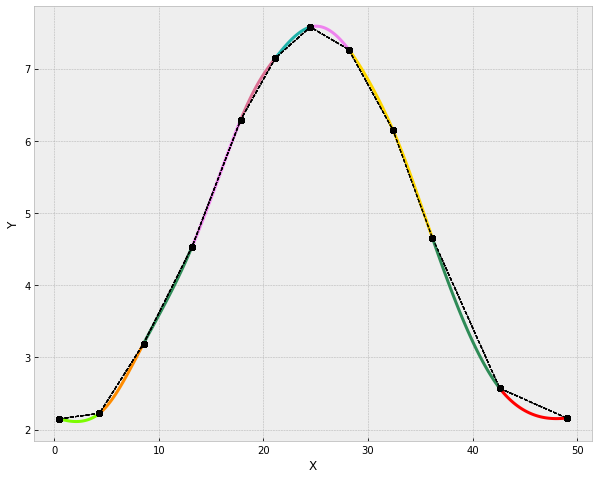

In [7]:
points_num = 41
pointsX = []
pointsY = []
plt.style.use("bmh")
fig = plt.figure(figsize=(10, 8)).add_subplot()
for i in range(0, len(data_points) + 2 - 3, 1):
    u = 0
    control_points = vertices_matrix[i:i+4]
#     print(control_points)
    for point_num in range(0, points_num):
        f1_u = (1/6)*u**3
        f2_u = (1/6)*u**2
        f3_u = (1/6)*u
        f4_u = 1/6
        blending_function = np.array([f1_u, f2_u, f3_u, f4_u])
        u = u + 1 / (points_num - 1)
        pointsX.append(np.dot(np.dot(blending_function, con_matrix), control_points)[0])
        pointsY.append(np.dot(np.dot(blending_function, con_matrix), control_points)[1])
    plt.plot(pointsX, pointsY, color=random.choice(color), lw=3)
    plt.plot(data_points["X"], data_points["Y"], marker="o", color="black", ls="--", lw=1)
    pointsX = []
    pointsY = []
plt.xlabel("X")
plt.ylabel("Y")
plt.show()